# Convolutional Neural Network

### Importing the libraries

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [21]:
import numpy as np
import os

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    shear_range=0.2,         # Apply random shear transformations
    zoom_range=0.2,          # Apply random zoom transformations
    horizontal_flip=True     # Enable random horizontal flipping
)

training_set = train_datagen.flow_from_directory(
    '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/training_set',  # Path to training dataset
    target_size=(64, 64),    # Resize all images to 64x64
    batch_size=32,           # Number of samples per batch
    class_mode='binary'      # Classification type ('binary' for 2 classes)
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize pixel values

test_set = test_datagen.flow_from_directory(
    '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/test_set',  # Path to test dataset
    target_size=(64, 64),    # Resize all images to 64x64
    batch_size=32,           # Number of samples per batch
    class_mode='binary'      # Classification type
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [128]:
cnn = Sequential()

### Step 1 - Convolution

In [129]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

### Step 2 - Pooling

In [130]:
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [131]:
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [132]:
cnn.add(Flatten())

### Step 4 - Full Connection

In [133]:
cnn.add(Dense(units=256, activation='relu'))

### Step 5 - Output Layer

In [134]:
cnn.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [135]:
cnn.compile(optimizer='adam',  # Optimizer for faster convergence
            loss='binary_crossentropy',  # Loss function for binary classification
            metrics=['accuracy'])  # Metric to track during training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)


### Training the CNN on the Training set and evaluating it on the Test set

In [140]:
history = cnn.fit(training_set,  # Training data
                  validation_data=test_set,  # Validation data (test set)
                  epochs=25,  # Number of epochs
                  batch_size=32,  # Batch size
                  callbacks=[lr_scheduler],  # Add learning rate scheduler
                  verbose=1)  # Set verbose to 1 to display training progress

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.8221 - loss: 0.3960 - val_accuracy: 0.7965 - val_loss: 0.4577 - learning_rate: 0.0010
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.8313 - loss: 0.3784 - val_accuracy: 0.8015 - val_loss: 0.4488 - learning_rate: 0.0010
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.8260 - loss: 0.3735 - val_accuracy: 0.7795 - val_loss: 0.5230 - learning_rate: 0.0010
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.8306 - loss: 0.3750 - val_accuracy: 0.7980 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.8339 - loss: 0.3613 - val_accuracy: 0.8170 - val_loss: 0.4437 - learning_rate: 0.0010
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.8544 - loss: 0.3204 - val_accuracy: 0.8125 - val_loss: 0.4573 - learning_rate: 0.0010
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.8639 - l

## Part 4 - Making a single prediction

In [141]:
from tensorflow.keras.preprocessing import image

# path of two image
img_path_1 = '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_1.jpg'
img_path_2 = '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_2.jpg'

# first image
test_image_1 = image.load_img(img_path_1, target_size=(64, 64))
test_image_1 = image.img_to_array(test_image_1) / 255
test_image_1 = test_image_1.reshape(1, 64, 64, 3)  

# second image
test_image_2 = image.load_img(img_path_2, target_size=(64, 64))
test_image_2 = image.img_to_array(test_image_2) / 255
test_image_2 = test_image_2.reshape(1, 64, 64, 3)  

In [142]:
# prediction for two image
prediction_1 = cnn.predict(test_image_1)
prediction_2 = cnn.predict(test_image_2)

# prediction result
print(f"Prediction for cat_or_dog_1.jpg: {prediction_1}")
print(f"Prediction for cat_or_dog_2.jpg: {prediction_2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Prediction for cat_or_dog_1.jpg: [[0.9999998]]
Prediction for cat_or_dog_2.jpg: [[0.07567781]]


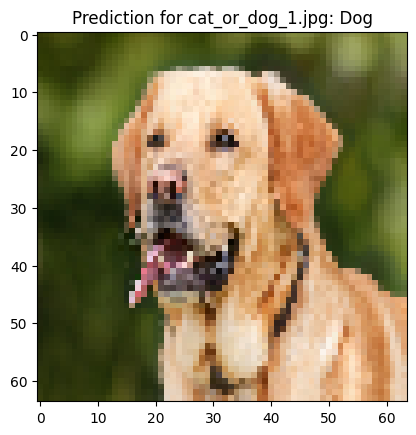

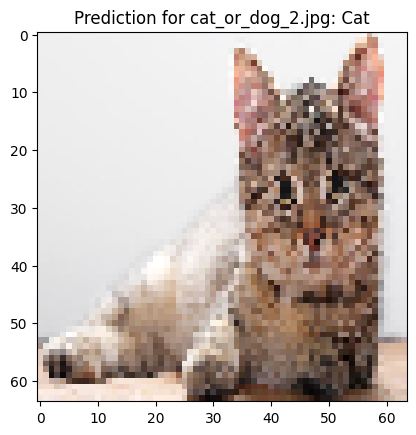

In [143]:
# Show prediction of the first image
plt.imshow(test_image_1[0])
plt.title(f"Prediction for cat_or_dog_1.jpg: {'Dog' if prediction_1[0] > 0.5 else 'Cat'}")
plt.show()

# Show prediction of the second image
plt.imshow(test_image_2[0])
plt.title(f"Prediction for cat_or_dog_2.jpg: {'Dog' if prediction_2[0] > 0.5 else 'Cat'}")
plt.show()

In [149]:
# Links

print('My GitHub Repository: (https://github.com/Shirui-Zhang)')

print('My Medium Article: https://medium.com/@zhangshirui24')

My GitHub Repository: (https://github.com/Shirui-Zhang)
My Medium Article: https://medium.com/@zhangshirui24
